In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [31]:
format = "1"

format_name = ""
if format == "1":
    format_name = "Tests"
elif format == "2":
    format_name = "ODIs"
else:
    format_name = "T20s"

In [32]:
player = 'Virat Kohli'
print(player.lower())
print(player.lower().replace(" ","%20"))
url = "http://search.espncricinfo.com/ci/content/player/search.html?search=" + player.lower().replace(" ","%20") 
#headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36',
           #'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
          #'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       #'Accept-Encoding': 'none',
       #'Accept-Language': 'en-US,en;q=0.8',
       #'Connection': 'keep-alive'}
headers = {'User-Agent': 'Custom'}
page = requests.get(url,headers=headers)
print(page)

virat kohli
virat%20kohli
<Response [200]>


In [33]:
soup = BeautifulSoup(page.content, "html.parser")
player_id = str(soup.find_all(class_='ColumnistSmry')[0]).split('.html')[0].split('/')[-1]
print(player_id)
#df_list = pd.read_html(f'https://stats.espncricinfo.com/ci/engine/player/{player_id}.html?class={format};template=results;type=batting;view=innings')

url1 = "https://stats.espncricinfo.com/ci/engine/player/"+player_id+ ".html?class="+format+";template=results;type=batting;view=innings"
print(url1)
response = requests.get(url1,headers=headers)
print(response)
df_list = pd.read_html(response.text)
df = df_list[3]
df.head()

253802
https://stats.espncricinfo.com/ci/engine/player/253802.html?class=1;template=results;type=batting;view=innings
<Response [200]>


,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,4,13,10,1,0,40.00,5,caught,1,NaN,v West Indies,Kingston,20 Jun 2011,Test # 1997
1,15,72,54,2,0,27.77,5,caught,3,NaN,v West Indies,Kingston,20 Jun 2011,Test # 1997
2,0,1,2,0,0,0.00,5,caught,1,NaN,v West Indies,Bridgetown,28 Jun 2011,Test # 1998
3,27,118,107,1,1,25.23,5,caught,3,NaN,v West Indies,Bridgetown,28 Jun 2011,Test # 1998
4,30,62,53,2,0,56.60,5,caught,2,NaN,v West Indies,Roseau,6 Jul 2011,Test # 1999


In [34]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,4,13,10,1,0,40.00,5,caught,1,NaN,v West Indies,Kingston,20 Jun 2011,Test # 1997
1,15,72,54,2,0,27.77,5,caught,3,NaN,v West Indies,Kingston,20 Jun 2011,Test # 1997
2,0,1,2,0,0,0.00,5,caught,1,NaN,v West Indies,Bridgetown,28 Jun 2011,Test # 1998
3,27,118,107,1,1,25.23,5,caught,3,NaN,v West Indies,Bridgetown,28 Jun 2011,Test # 1998
4,30,62,53,2,0,56.60,5,caught,2,NaN,v West Indies,Roseau,6 Jul 2011,Test # 1999


In [35]:
runs = []
notout = []
innings = 0
batting_avg = []
hundreds = []
for i in df.Runs:
    if i != 'DNB' and i != 'TDNB' and i != 'sub':
        if '*' not in i:
            innings += 1
            notout.append(False)
        else:
            notout.append(True)
        runs.append(int(i.replace('*','')))
        if innings != 0:
            batting_avg.append(sum(runs)/innings)
        else:
            batting_avg.append(0)
        if len(hundreds) == 0:
            if runs[0] > 100:
                hundreds.append(1)
            else:
                hundreds.append(0)

        if runs[len(runs)-1]>=100 and len(hundreds)>0:
            hundreds.append(hundreds[len(hundreds)-1]+1)
        elif len(hundreds)>0:
            hundreds.append(hundreds[len(hundreds)-1])
    else:
        if len(runs) == 0:
            batting_avg.append(0)
            hundreds.append(0)
        else:
            batting_avg.append(batting_avg[len(batting_avg)-1])
            hundreds.append(hundreds[len(hundreds)-1])

df['batting_avg'] = pd.Series(batting_avg)
df['hundreds'] = pd.Series(hundreds)

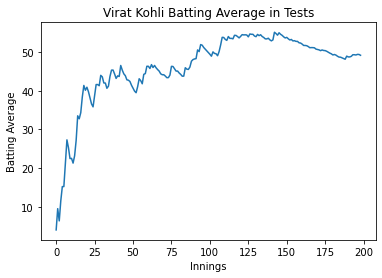

In [36]:
plt.title(f'{player} Batting Average in {format_name}')
plt.xlabel('Innings')
plt.ylabel('Batting Average')
plt.plot(df['batting_avg'])
plt.show()

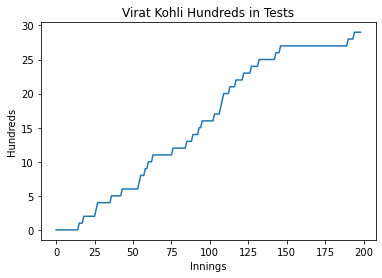

In [37]:
plt.title(f'{player} Hundreds in {format_name}')
plt.xlabel('Innings')
plt.ylabel('Hundreds')
plt.plot(df['hundreds'])
plt.show()

In [42]:
def stats(player, form):
        url = "http://search.espncricinfo.com/ci/content/player/search.html?search=" + player.lower().replace(" ","%20")
        headers = {'User-Agent': 'Custom'}
        page = requests.get(url,headers=headers)
        soup = BeautifulSoup(page.content, "html.parser")
        player_id = str(soup.find_all(class_='ColumnistSmry')[0]).split('.html')[0].split('/')[-1]
        url1 = "https://stats.espncricinfo.com/ci/engine/player/"+player_id+ ".html?class="+format+";template=results;type=batting;view=innings"
        response = requests.get(url1,headers=headers)
        df_list = pd.read_html(response.text)
        df = df_list[3]
        runs = []
        notout = []
        innings = 0
        batting_avg = []
        hundreds = []
        
        for i in df.Runs:
            if i != 'DNB' and i != 'TDNB' and i != 'sub':
                if '*' not in i:
                    innings += 1
                    notout.append(False)
                else:
                    notout.append(True)
                runs.append(int(i.replace('*','')))
                batting_avg.append(sum(runs)/innings)
                if len(hundreds) == 0:
                    if runs[0] > 100:
                        hundreds.append(1)
                    else:
                        hundreds.append(0)
        
                if runs[len(runs)-1]>=100 and len(hundreds)>0:
                    hundreds.append(hundreds[len(hundreds)-1]+1)
                elif len(hundreds)>0:
                    hundreds.append(hundreds[len(hundreds)-1])
            else:
                runs.append(0)
                if len(runs) == 0:
                    batting_avg.append(0)
                    hundreds.append(0)
                else:
                    batting_avg.append(batting_avg[len(batting_avg)-1])
                    hundreds.append(hundreds[len(hundreds)-1])
        
        
        
        df['batting_avg'] = pd.Series(batting_avg)
        df['hundreds'] = pd.Series(hundreds)
        df['runs'] = pd.Series(runs)
        
        return df

In [44]:
df = stats('Steven Smith', 1)
df2 = stats('Marnus Labuschagne', 1)

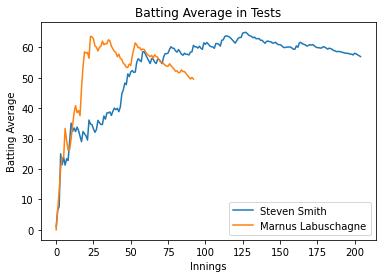

In [45]:
plt.title(f'Batting Average in {format_name}')
plt.xlabel('Innings')
plt.ylabel('Batting Average')
plt.plot(df['batting_avg'])
plt.plot(df2['batting_avg'])
plt.legend(['Steven Smith', 'Marnus Labuschagne'])
plt.show()